# Superstore Exploratory Data Analysis Project

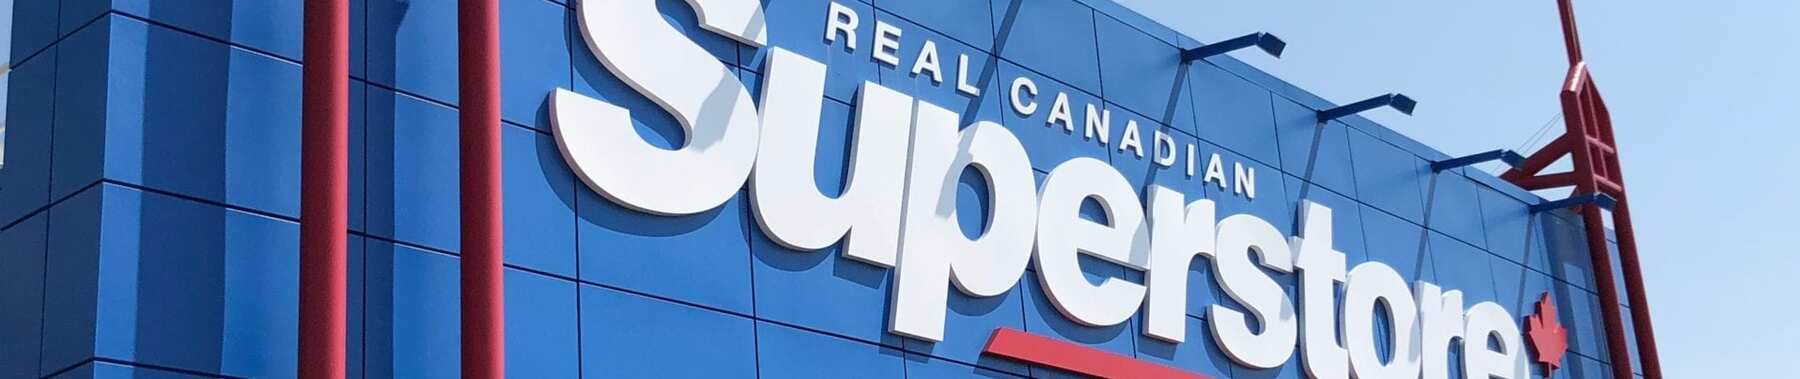

### Superstore dataset
The superstore dataset came from Kaggle. To the data, the superstore is a large size of a supermarket, often selling household goods, clothes, and electrical goods, as well as food. Superstores typically charge from 15 to 45 percent less than their smaller counterparts. The received information is required to implement exploratory data analysis to explore a drawback to lead to developing the company’s higher profitability.
### Objective
- Explored insights to find a drawback to lead developing the company’s higher profitability by performing exploratory data analysis and visualizations 

### Explain the dataset
The dataset consists of 13 columns:
- Ship mode, Segment of customers, Country (Only USA), City, State, Postal code, Region, Category of goods, Subcategory, Sales (Sales that have not been deducted from various costs or discounts), Quantity of order, Discount, and Profit

## Step taken
### 1. Data Cleansing
First, we must do data cleansing before we explore the data analysis. This step is significant because they help us to find insight accurately to make easier and faster decisions, deal with outliers, and visualize the pattern of erroneous data to prevent and improve data ingestion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in csv file
df = pd.read_csv(r'C:\Users\User\Downloads\archive (5)\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Copy Dataframe
df_copy = df.copy()

In [4]:
# Missing data checking
df_copy.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Data types checking
df_copy.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
# Data duplicate checking
df_copy.duplicated().sum()

17

In [7]:
df_copy = df_copy.drop_duplicates()
df_copy.duplicated().sum()

0

In [8]:
df_copy.shape

(9977, 13)

In [9]:
df_copy.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148801,3.790719,0.156278,28.689832
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721432,2.226657,0.206455,234.457848
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.726200
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.671000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.372000


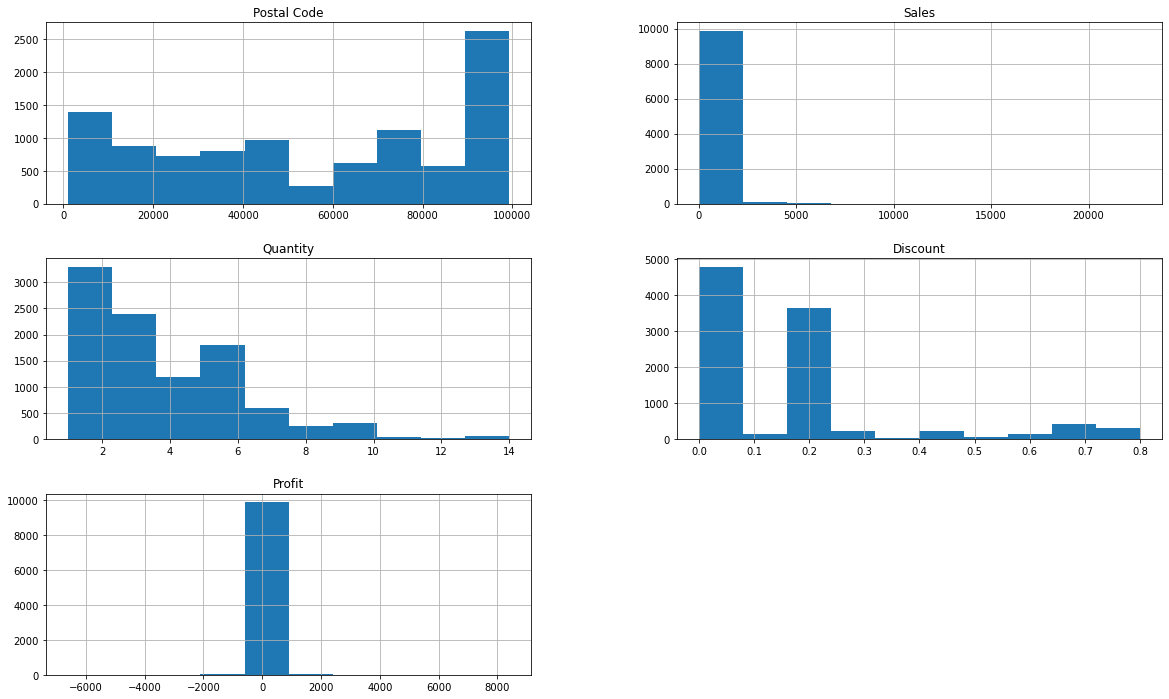

In [10]:
df_copy.hist(figsize = (20,12))
plt.show()

In [11]:
# Category checking
df_copy['Ship Mode'].value_counts() 

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [12]:
df_copy['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [13]:
df_copy['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [14]:
df_copy['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [15]:
df_copy.groupby(['Category','Sub-Category'])['Quantity'].sum()

Category         Sub-Category
Furniture        Bookcases        868
                 Chairs          2351
                 Furnishings     3560
                 Tables          1241
Office Supplies  Appliances      1729
                 Art             2996
                 Binders         5971
                 Envelopes        906
                 Fasteners        914
                 Labels          1396
                 Paper           5144
                 Storage         3158
                 Supplies         647
Technology       Accessories     2976
                 Copiers          234
                 Machines         440
                 Phones          3289
Name: Quantity, dtype: int64

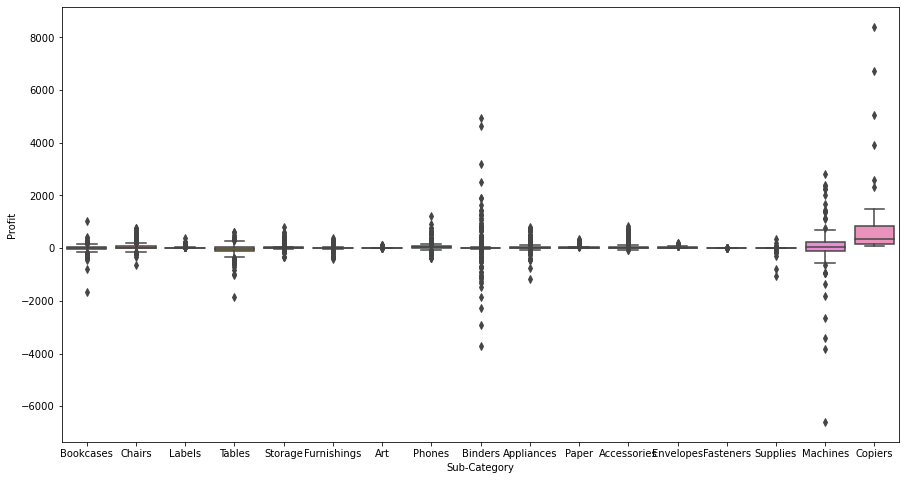

In [16]:
plt.subplots(figsize = (15,8))
sns.boxplot(data = df_copy, x = 'Sub-Category', y = 'Profit')
plt.show()

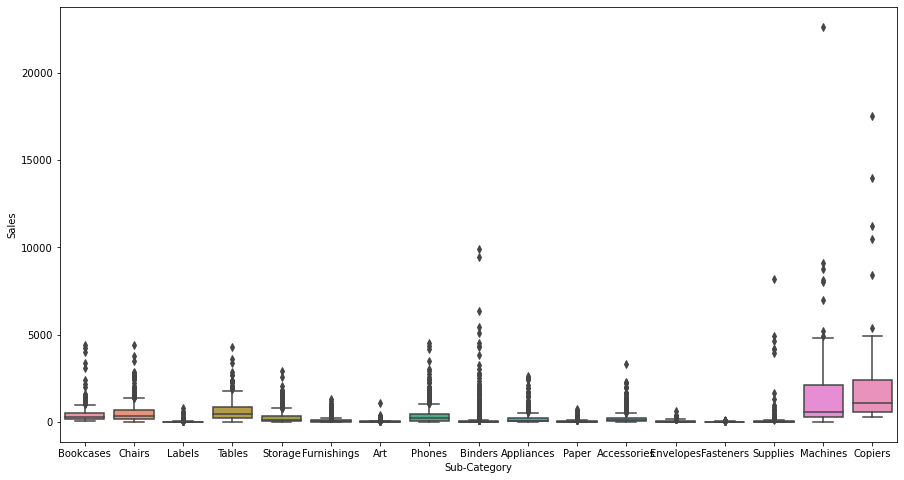

In [17]:
plt.subplots(figsize = (15,8))
sns.boxplot(data = df_copy, x = 'Sub-Category', y = 'Sales')
plt.show()

### 2. Exploratory Data Analysis
This step will help us to find insights into the problems. It can help us understand and can solve those problems exactly. We will explore the dataset and visualize it to show some insights.

In [18]:
## Gross sale
df_copy['Sales'].sum()

2296194.5903

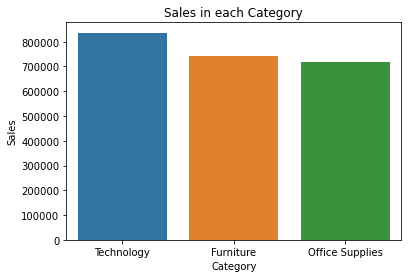

In [52]:
## Sales of category
category_sale = df_copy.groupby('Category', as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
sns.barplot(data = category_sale, x = 'Category', y = 'Sales')
plt.title('Sales in each Category')
plt.show()

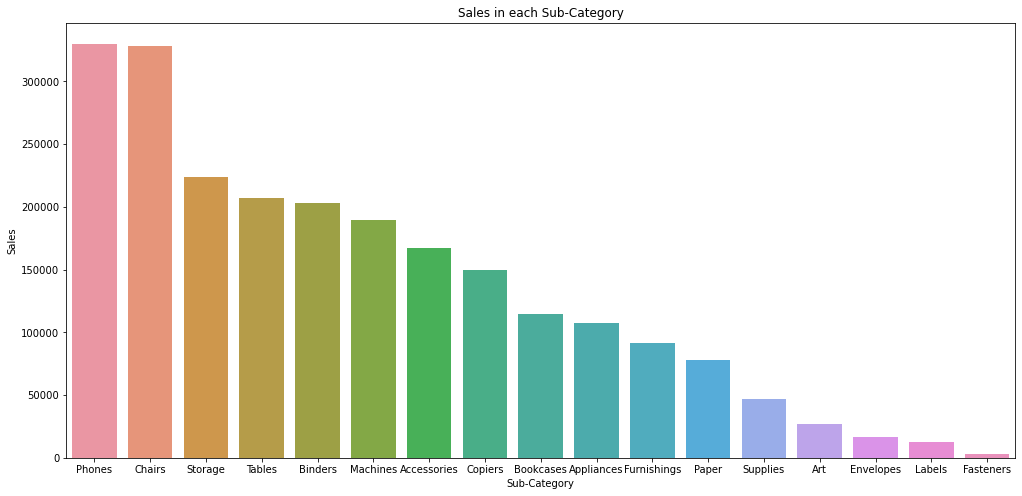

In [53]:
## Sale of sub-category
sub_category_sale = df_copy.groupby('Sub-Category', as_index = False)['Sales'].sum().sort_values(
    by = 'Sales', ascending = False)
plt.subplots(figsize = (17,8))
sns.barplot(data = sub_category_sale, x = 'Sub-Category', y = 'Sales')
plt.title('Sales in each Sub-Category')
plt.show()

In [21]:
## Profits
df_copy['Profit'].sum()

286238.45180000004

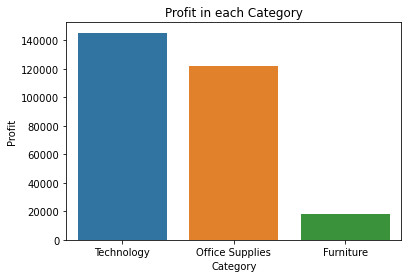

In [54]:
## profit of category
category_profit = df_copy.groupby('Category', as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)
sns.barplot(data = category_profit, x = 'Category', y = 'Profit')
plt.title('Profit in each Category')
plt.show()

#### Observations:
- Why is the furniture category high sales but low profits? 

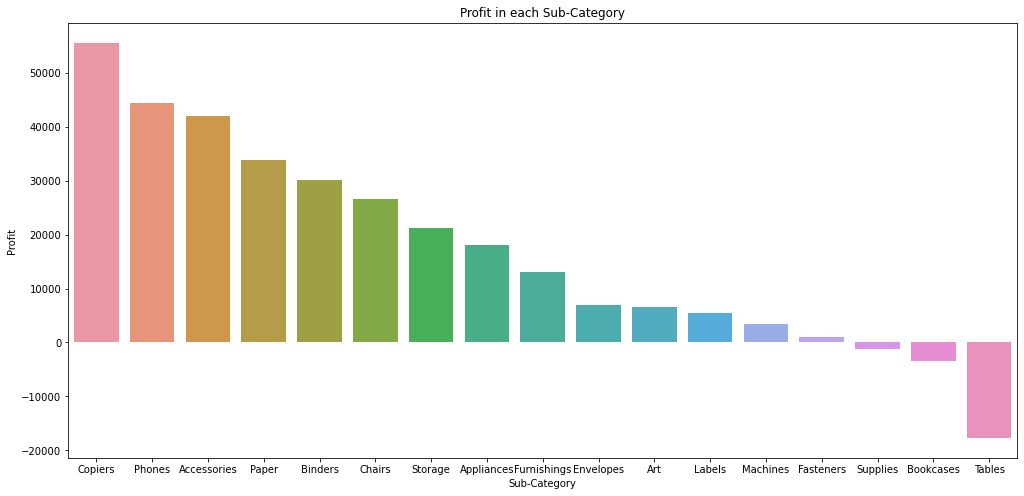

In [55]:
## profit of sub-category
sub_category_profit = df_copy.groupby('Sub-Category', as_index = False)['Profit'].sum().sort_values(
    by = 'Profit', ascending = False)
plt.subplots(figsize = (17,8))
sns.barplot(data = sub_category_profit, x = 'Sub-Category', y = 'Profit')
plt.title('Profit in each Sub-Category')
plt.show()

#### Observations:
- There are sub-categories such as Bookcases and Tables that are at a loss, which are two out of four sub-categories in the Furniture category.

### Sales between no-discount and discount

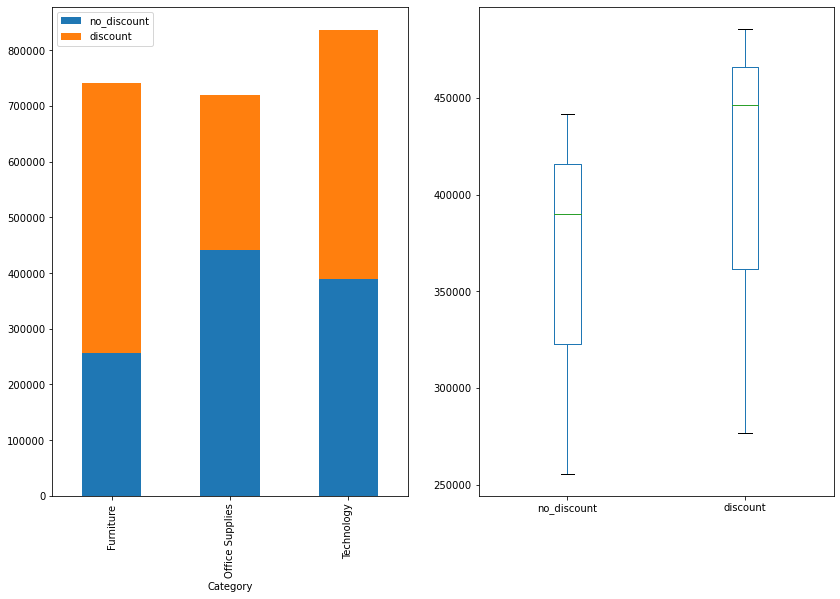

In [62]:
## Problem from Discount?
no_discount = df_copy[df_copy['Discount'] == 0.0].groupby('Category')['Sales'].sum()
discount = df_copy[df_copy['Discount'] > 0.0].groupby('Category')['Sales'].sum()

discount_category = pd.DataFrame([no_discount , discount], index=['no_discount', 'discount']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
discount_category.plot.bar(stacked=True, ax=axes[0])
discount_category.plot.box(ax=axes[1])
plt.show()

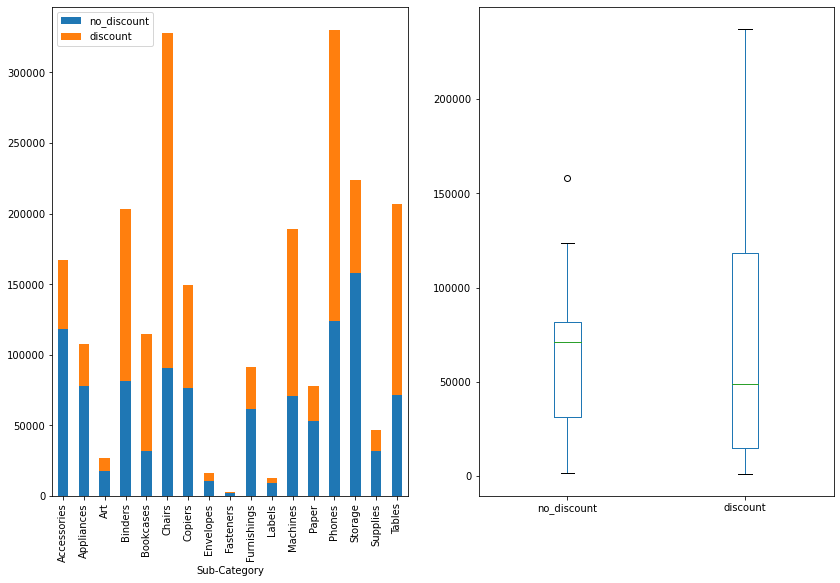

In [25]:
no_discount = df_copy[df_copy['Discount'] == 0.0].groupby('Sub-Category')['Sales'].sum()
discount = df_copy[df_copy['Discount'] > 0.0].groupby('Sub-Category')['Sales'].sum()

discount_sub_category = pd.DataFrame([no_discount , discount], index=['no_discount', 'discount']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
discount_sub_category.plot.bar(stacked=True, ax=axes[0])
discount_sub_category.plot.box(ax=axes[1])
plt.show()

### Profit between no-discount and discount

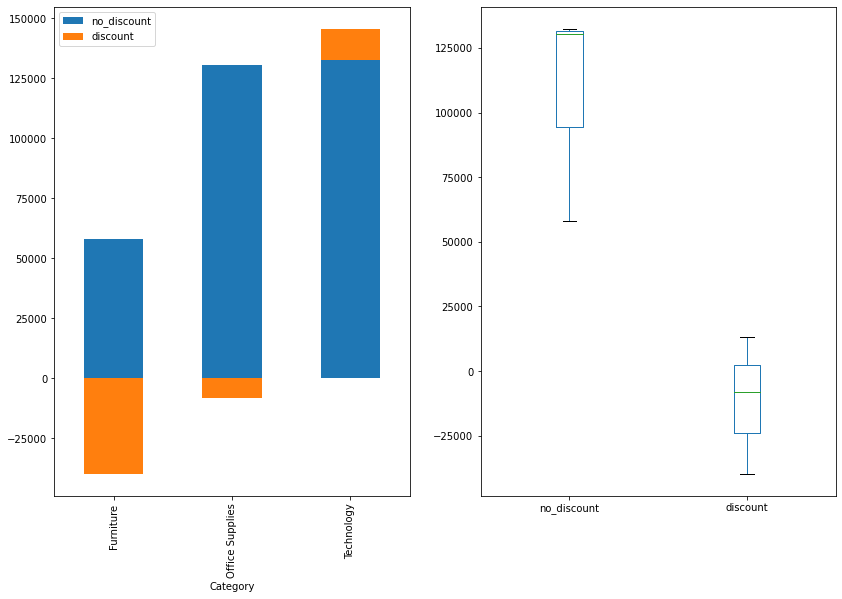

In [26]:
no_discount = df_copy[df_copy['Discount'] == 0.0].groupby('Category')['Profit'].sum()
discount = df_copy[df_copy['Discount'] > 0.0].groupby('Category')['Profit'].sum()

discount_category = pd.DataFrame([no_discount , discount], index=['no_discount', 'discount']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
discount_category.plot.bar(stacked=True, ax=axes[0])
discount_category.plot.box(ax=axes[1])
plt.show()

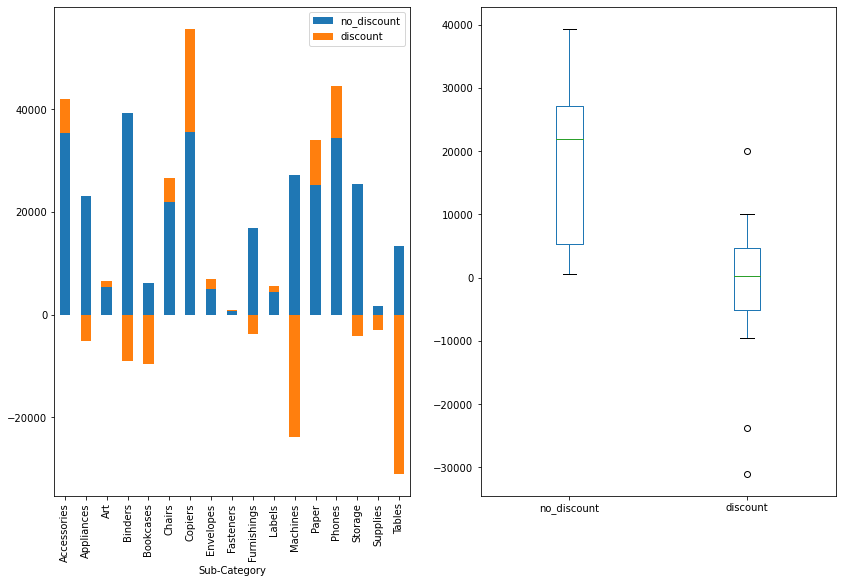

In [27]:
no_discount = df_copy[df_copy['Discount'] == 0.0].groupby('Sub-Category')['Profit'].sum()
discount = df_copy[df_copy['Discount'] > 0.0].groupby('Sub-Category')['Profit'].sum()

discount_sub_category = pd.DataFrame([no_discount , discount], index=['no_discount', 'discount']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
discount_sub_category.plot.bar(stacked=True, ax=axes[0])
discount_sub_category.plot.box(ax=axes[1])
plt.show()

#### Results:
1. The categories with high sales and profits are technology and office supplies.
2. The category of furniture is high sales but low profits.
3. The discounting results in increased sales, but at the same time, profits are reduced to losses.

#### Recommendation:
- Setting discounts to increase sales requires discounting to be more appropriate to prevent losses.